In [5]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
#GetHub url
# https://github.com/RenM23/COMP3800_Project1/tree/main

In [ ]:
#The aim of this project is to discover if there is a correlation between states with high population densities and an increase
#in air pollution. The data will be analyzed by comparing air pollution index per state population. Further investigation will
#be conducted to determine if states with high population saw an increase in pollution over time. This investigation will determine 
#if there is a significant correlation between high population states and air pollution.

In [7]:
df = pd.read_csv('Air_Quality_Measures_on_the_National_Environmental_Health_Tracking_Network.csv')
print(df.head())

   MeasureId                                        MeasureName MeasureType  \
0         83  Number of days with maximum 8-hour average ozo...      Counts   
1         83  Number of days with maximum 8-hour average ozo...      Counts   
2         83  Number of days with maximum 8-hour average ozo...      Counts   
3         83  Number of days with maximum 8-hour average ozo...      Counts   
4         83  Number of days with maximum 8-hour average ozo...      Counts   

  StratificationLevel  StateFips StateName  CountyFips CountyName  ReportYear  \
0      State x County          1   Alabama        1027       Clay        1999   
1      State x County          1   Alabama        1051     Elmore        1999   
2      State x County          1   Alabama        1073  Jefferson        1999   
3      State x County          1   Alabama        1079   Lawrence        1999   
4      State x County          1   Alabama        1089    Madison        1999   

   Value      Unit  UnitName    DataOr

In [9]:
print(df.shape)

(218635, 14)


In [11]:
#View Column names
print(df.columns.tolist())

['MeasureId', 'MeasureName', 'MeasureType', 'StratificationLevel', 'StateFips', 'StateName', 'CountyFips', 'CountyName', 'ReportYear', 'Value', 'Unit', 'UnitName', 'DataOrigin', 'MonitorOnly']


In [13]:
#View the highest values
print(df['Value'].max())

1084153095.0


In [15]:
#View columns details
df_view = df.groupby(['Value','Unit', 'StateName', 'ReportYear'])

#Select only desired columns
df_view_filtered = df_view[['Value','Unit', 'StateName', 'ReportYear']]

print(df_view_filtered.head(6))

            Value      Unit StateName  ReportYear
0       33.000000  No Units   Alabama        1999
1        5.000000  No Units   Alabama        1999
2       39.000000  No Units   Alabama        1999
3       28.000000  No Units   Alabama        1999
4       31.000000  No Units   Alabama        1999
...           ...       ...       ...         ...
218630   6.207126     µg/m³   Wyoming        2007
218631   6.369764     µg/m³   Wyoming        2008
218632   6.241708     µg/m³   Wyoming        2009
218633   6.125957     µg/m³   Wyoming        2010
218634   6.646464     µg/m³   Wyoming        2011

[126086 rows x 4 columns]


In [17]:
#Sort dataframe by State, MeasureType, UnitName and Value descending
df_sorted = df.sort_values(by=['Value', 'StateName'], ascending=[False, True])

print(df_sorted.head(5))

       MeasureId                                        MeasureName  \
5759          84  Number of person-days with maximum 8-hour aver...   
83766        293  Number of person-days with maximum 8-hour aver...   
34298         86  Person-days with PM2.5 over the National Ambie...   
4413          84  Number of person-days with maximum 8-hour aver...   
83765        293  Number of person-days with maximum 8-hour aver...   

      MeasureType StratificationLevel  StateFips   StateName  CountyFips  \
5759       Counts      State x County          6  California        6037   
83766      Counts      State x County          6  California        6037   
34298      Counts      State x County          6  California        6037   
4413       Counts      State x County          6  California        6037   
83765      Counts      State x County          6  California        6037   

        CountyName  ReportYear         Value      Unit  UnitName  \
5759   Los Angeles        2003  1.084153e+09  No

In [19]:
#Group by Value, Unit, StateName, ReportYear
df_categories = df_sorted.groupby(['Value','Unit', 'StateName', 'ReportYear'])

#Drop unwanted features
df_categories = df_categories[['Value','Unit', 'StateName', 'ReportYear']]

print(df_categories.head(5))

               Value      Unit   StateName  ReportYear
5759    1.084153e+09  No Units  California        2003
83766   1.084153e+09  No Units  California        2003
34298   1.026965e+09  No Units  California        1999
4413    9.997090e+08  No Units  California        2002
83765   9.997090e+08  No Units  California        2002
...              ...       ...         ...         ...
37410   0.000000e+00  No Units     Wyoming        1999
37469   0.000000e+00  No Units     Wyoming        1999
149624  0.000000e+00         %     Wyoming        2004
149713  0.000000e+00         %     Wyoming        2005
149986  0.000000e+00         %     Wyoming        2001

[122875 rows x 4 columns]


In [45]:
#Check for missing values
missing_values = df_categories.isnull().sum()
print ("Missing values: \n", missing_values)

Missing values: 
 MeasureId              0
MeasureName            0
MeasureType            0
StratificationLevel    0
StateFips              0
StateName              0
CountyFips             0
CountyName             0
ReportYear             0
Value                  0
Unit                   0
UnitName               0
DataOrigin             0
MonitorOnly            0
dtype: int64


In [47]:
#Check for duplicates
duplicates =df_categories.duplicated().sum()
print("Number of duplicated rows: ", duplicates)

Number of duplicated rows:  0


In [29]:
#Check for outliers
upper_limit = df_categories['Value'].quantile(0.99)
df_categories.loc[df_categories['Value'] > upper_limit, 'Value'] = upper_limit
print(df_categories.head())

       MeasureId                                        MeasureName  \
5759          84  Number of person-days with maximum 8-hour aver...   
83766        293  Number of person-days with maximum 8-hour aver...   
34298         86  Person-days with PM2.5 over the National Ambie...   
4413          84  Number of person-days with maximum 8-hour aver...   
83765        293  Number of person-days with maximum 8-hour aver...   

      MeasureType StratificationLevel  StateFips   StateName  CountyFips  \
5759       Counts      State x County          6  California        6037   
83766      Counts      State x County          6  California        6037   
34298      Counts      State x County          6  California        6037   
4413       Counts      State x County          6  California        6037   
83765      Counts      State x County          6  California        6037   

        CountyName  ReportYear       Value      Unit  UnitName    DataOrigin  \
5759   Los Angeles        2003  1727

In [31]:
#Create a bar graph of the Top 5 States with the Highest Values of pollution 
state_values = df_categories.groupby('StateName')['Value'].sum().sort_values(ascending=False)

top_5_states = state_values.head(5)


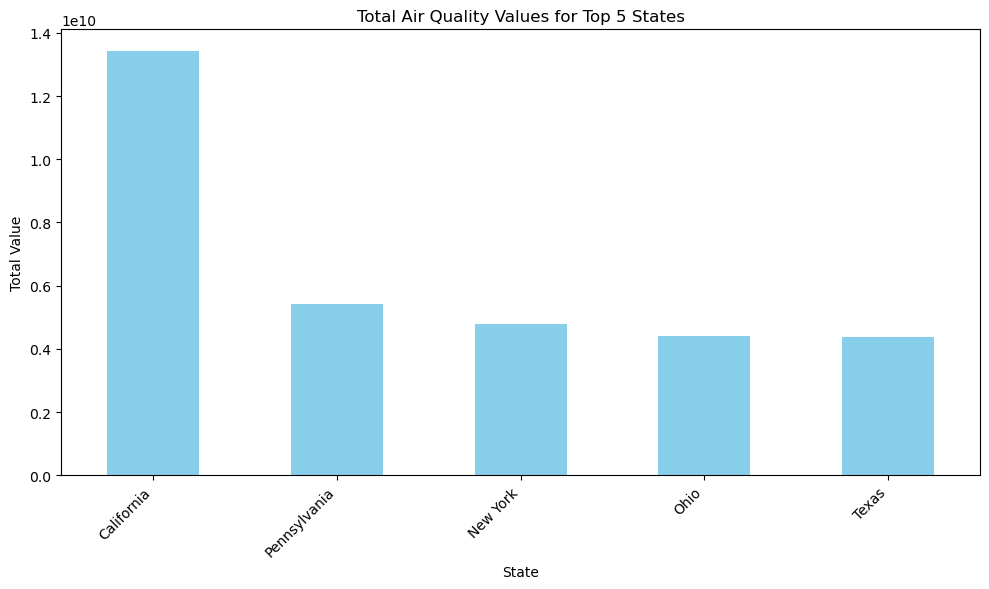

In [33]:
#Plot graph
plt.figure(figsize=(10,6))
top_5_states.plot(kind='bar', color='skyblue')
plt.title('Total Air Quality Values for Top 5 States')
plt.xlabel('State')
plt.ylabel('Total Value')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
#Summary
#This dataset describes air pollution by state and county. Although my research is able to visually show the states with the highest
#pollution, my findings did not reveal a population correllation. This dataset does not contain population data.  